# Regression Logistique

## Importation des dépendances

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importer le dataset

In [2]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values
print(dataset.head())

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0


## Diviser le dataset entre le training set et le test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Construction du modèle

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Faire de nouvelles prédictions

In [6]:
y_pred = classifier.predict(X_test)

## Matrice de confusion

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = 0
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if (i==j):
            accuracy += cm[i][j]
accuracy /= len(y_test)

## Visualiser les résultats

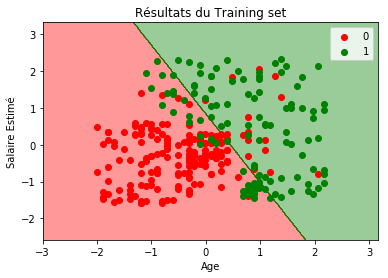

In [8]:
# Les points verts correspondent aux observations de personnes ayant acheté
# Les points rouges correspondent aux observations de personnes n'ayant pas acheté
# La zone verte correspond a la zone pour laquelle le modele predit un achat
# La zone rouge correspond a la zone pour laquelle le modele predit qu'il n'y aura pas d'achat
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# on colorie les zones en prenant chaque pixel et en faisant une prediction
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# on place les points sur le graphique
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()